*워드투벡터는 각 단어 벡터가 단어 간 유사도를 반영한 값을 가지고 있다.*

## 1. 희소 표현(Sparse Representation)
* 벡터 또는 행렬(matrix)의 값이 대부분 0으로 표현되는 방법
* **각 단어간 유사성을 표현할 수 없다.**
* 이에 대한 대안으로 단어의 '의미'를 다차원 공간에 벡터화하는 방법 => **분산 표현(distributed representation)**
* 이러한 분산 표현을 이용하여 단어의 유사도를 벡터화하는 작업 => 워드 임베딩(embedding)
* 저차원을 가지므로 밀집 벡터(dense vector)에도 속한다.

## 2. 분산 표현(Distributed Representation)
* 분산 표현(distributed representation) 방법은 기본적으로 분포 가설(distributional hypothesis)이라는 가정 하에 만들어진 표현 방법 => **'비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'**
* 분산 표현은 분포 가설을 이용하여 단어들의 셋을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산하여 표현한다.
* 굳이 벡터의 차원이 단어 집합의 크기가 될 필요가 없기 때문에 벡터의 차원이 상대적으로 저차원으로 줄어든다.

=> 요약: 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 **단어의 의미를 여러 차원에다가 분산**하여 표현, 단어 간 유사도 계산 가능

## 3. CBOW(Continuous Bag of Words)
* Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다.
* CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법이다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법이다.

----------------------------------------------------------------------
* 예측해야하는 단어는 중심 단어(center word), 예측에 사용되는 단어들을 주변 단어(context word)라고 한다.
* 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 윈도우(window)라고 한다.
* 윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 한다.
* Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 한다.

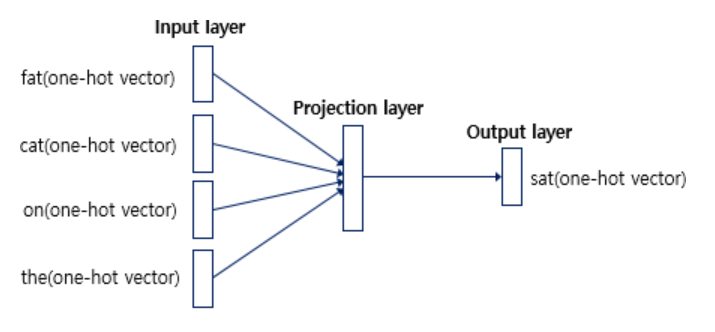

In [1]:
from IPython.display import Image
Image('./data/CBOW의 인공신경망 도식화.PNG')

* 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요하다.
* Word2Vec는 입력층과 출력층 사이에 하나의 은닉층(hidden Layer)가 존재해 심층신경망(Deep Neural Network)이 아닌 얕은 신경망(Shallow Neural Network)라고 부른다.
* 또한, Word2Vec의 은닉층은 일반적인 은닉층과 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 투사층(projection layer)라고 부르기도 한다.

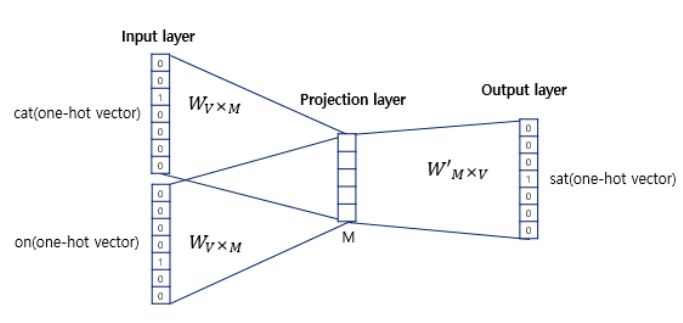

In [2]:
from IPython.display import Image
Image('./data/CBOW의 인공신경망 확대.PNG')

* 투사층의 크기가 M이다.이는 임베딩하고 난 벡터의 차원이다.위에 그림에서는 투사층의 크기가 5이기 때문에 CBOW 수행 후 각 단어의 임베딩 벡터의 차원은 5가 될 것이다.
* 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬이다. 여기서 V는 단어 집합의 크기를 의미.
* 이 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬이다.

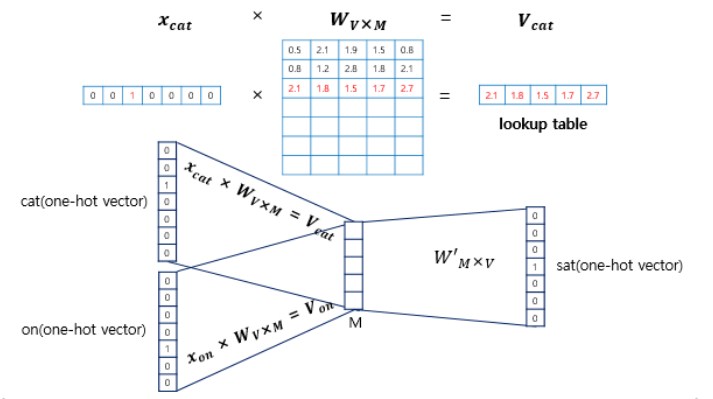

In [3]:
from IPython.display import Image
Image('./data/CBOW의 인공신경망3.PNG')

* 각 주변 단어의 원-핫 벡터를 x로 표기, 입력 벡터는 원-핫 벡터.
*  입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일
* CBOW의 목적은 W와 W'를 잘 훈련시키는 것으로, 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문

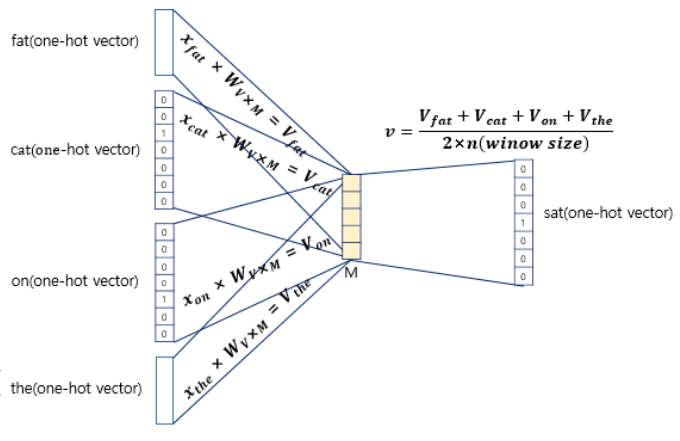

In [4]:
from IPython.display import Image
Image('./data/CBOW의 인공신경망4.PNG')

* 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 된다.
* 투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점이기도 하다.(Skip-Gram은 입력이 중심 단어 하나이기때문에 투사층에서 벡터의 평균을 구하지 않는다.)

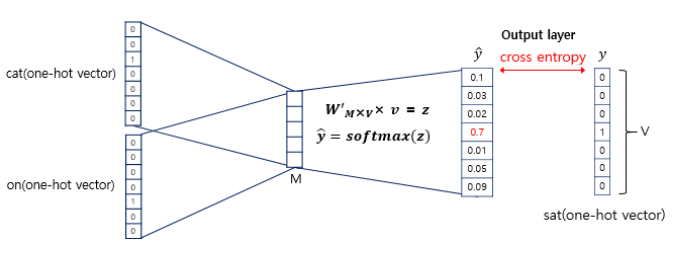

In [5]:
from IPython.display import Image
Image('./data/CBOW의 인공신경망5.PNG')

* 이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해진다.
* 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나온다.
* 이 벡터에 CBOW는 소프트맥스(softmax) 함수를 취하는데, 소프트맥스 함수로 인한 출력값은 0과 1사이의 실수로, 각 원소의 총 합은 1이 되는 상태로 바뀐다.이렇게 나온 벡터를 스코어 벡터(score vector)라고 한다.

스코어 벡터의 각 차원 안에서의 값이 의미하는 것은
* 스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타낸다.
* 그리고 이 스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 한다.
=> 스코어 벡터와 중심 단어 벡터값의 오차를 줄이기 위해 CBOW는 손실 함수(loss function)로 cross-entropy 함수 사용


* 이제 역전파(Back Propagation)를 수행하면 W와 W'가 학습이 되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정

## 4. Skip-gram
* Skip-gram은 중심 단어에서 주변 단어를 예측

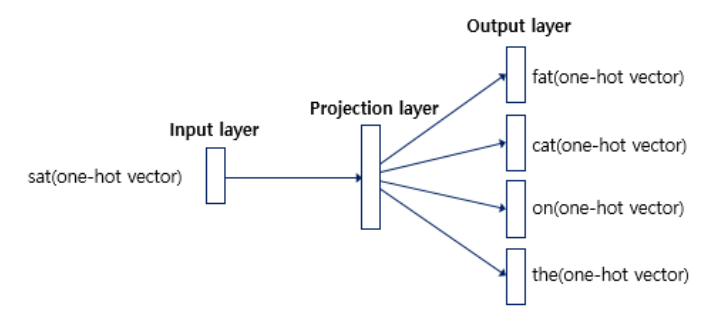

In [7]:
from IPython.display import Image
Image('./data/Skip-gram의 인공신경망 도식화.PNG')

## 5. NNLM Vs. Word2Vec
* NNLM의 느린 학습 속도와 정확도를 개선하여 탄생한 것이 Word2Vec
* NNLM은 언어 모델이므로 다음 단어를 예측, Word2Vec(CBOW)은 워드 임베딩 자체가 목적이므로 다음 단어가 아닌 중심 단어를 예측
* NNLM은 예측 단어의 이전 단어들만 참고, Word2Vec는 예측 단어의 전, 후 단어 모두 참고
* Word2Vec은 NNLM에 존재하던 활성화 함수가 있는 은닉층을 제거
* Word2Vec는 계층적 소프트맥스(hierarchical softmax)와 네거티브 샘플링(negative sampling) 기법들을 사용